# Notebook 1 - Anisotropic Model

- This notebook demonstrates the bayesian statistical analysis preformed Antikythera Calender the using the anisotropic model $(\sigma_r, \sigma_t)$
- It also acts as the main tutorial page, explaining the packages functionalities and justifyng the packages stucture

In [1]:
# Import necessary libraries
import jax.numpy as jnp
import pandas as pd
from calender_analysis import Calender_Analysis 
# ------------------ Data ------------------
original_data_path = "data/Hole_Measurements.csv"  
# ------------------ Rerun Computationally Expensive Analysis ------------------
rerun_comp_expensive_analysis = False

## The Overarching Equations
To model the positions of holes on the fragmented calendar ring, we assume the original ring contained $ N $ holes, evenly spaced along a full circular arc of radius $ r $. However, since the ring is now fragmented, we treat it as a set of $ s $ contiguous arc sections that have undergone slight **displacements** and **rotations** relative to each other.

### **Hole Coordinates in the Fragmented Sections**
The **observed hole positions** are given as Cartesian coordinates:

$$
\vec{d}_i = (x_i, y_i),
$$


Each section is assumed to have an unknown reference point, representing its **center of rotation**:

$$
\vec{r}_0^j = (x_0^j, y_0^j), \quad 0 \leq j \leq (s - 1)
$$

where $ s $ is the total number of sections.

Additionally, each section has an **angular offset** $ \alpha_j $, representing the unknown orientation of that section relative to the full ring.

### **Assigning Angles to Holes**
The angular position of the $ i $-th hole in the $ j $-th section is given by:

$$
\phi_{ij} = 2\pi \frac{(i - 1)}{N} + \alpha_j.
$$


## Initialising the Models
The data analysis is preformed within a class based structure called **Calender_Analysis**

### Model Type Selection

The model can operate in one of two modes:

| **Model Type**       | **Description**                                                        |
|----------------------|------------------------------------------------------------------------|
| **Isotropic Model**  | Assumes a single $\sigma$ parameter for uncertainty in both dimensions. |
| **Anisotropic Model** | Uses separate $\sigma_r$ (radial) and $\sigma_t$ (tangential) parameters. |

### Dataset Filtering

The input dataset can be optionally filtered to remove unreliable sections.

This can be done to reduce the dimensionality of the model, without loosing information (data that constrains) on a given paramter. 

**The Majority of this pipeline using the Basic filter, justification of which is provided in a seperate notebook.**

| **Filtering Mode** | **Description** | **No. Sections** | **No. Holes** |
|--------------------|----------------|------------------|--------------|
| **None**  | No filtering applied. | 8 | 81 |
| **Basic** | Removes sections with only one hole. | 6 | 79 |
| **Full**  | Removes sections with fewer than three holes and discards the first and last hole in each section. | 4 | 66 |

### Default Priors

If no priors are provided, the model assigns reasonable default priors:
| **Parameter**       | **Description**                        | **Distribution**         |
|---------------------|----------------------------------------|--------------------------|
| **$N$**              | Total number of holes                  | Uniform(340, 370)       |
| **$r$**              | Ring radius                            | Uniform(65, 85)         |
| **$x_0$**         | Section offsets (x dim)                      | Normal(80, 5) |
| **$y_0$**         | Section offsets  (y dim)                    | Normal(135, 5) |
| **$\alpha$**              | Angular offsets                       | Normal(-2.5, 1)         |
| **$Errors$**    | **Isotropic**                          | **σ** ~ Uniform(0, 5)   |
|                   | **Anisotropic**                        | **$σ_r$** ~ Uniform(0, 5), **$σ_t$** ~ Uniform(0, 5) |


### Plotting observed data for `Filtering = None`

In [4]:
Antikythera_Anisotropic_No_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'None', priors = None, num_cores = 4)

2025-03-11 14:31:00,415 - INFO - JAX Detected Devices: 8
2025-03-11 14:31:00,416 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-11 14:31:00,425 - INFO -  
        DATA SUMMARY
Total Sections   : 8
Total Holes      : 81
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      0      |   1 - 1
      1      |   2 - 23
      2      |   24 - 32
      3      |   33 - 69
      4      |   70 - 70
      5      |   71 - 73
      6      |   74 - 75
      7      |   76 - 81 
--------------------------------- 


INFO:2025-03-11 14:31:00,451:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


2025-03-11 14:31:00,451 - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


INFO:2025-03-11 14:31:00,454:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


2025-03-11 14:31:00,454 - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


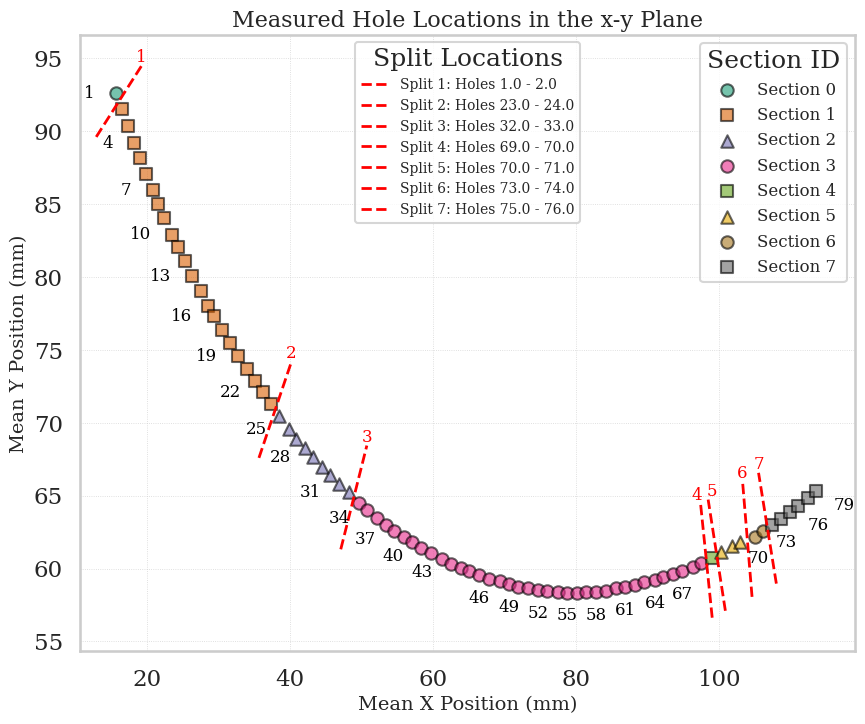

In [5]:
Antikythera_Anisotropic_No_Filter.plot_hole_locations()

### Plotting observed data for `Filtering = Basic`

In [2]:
Antikythera_Anisotropic_Basic_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'Basic', priors = None, num_cores = 4)

2025-03-11 15:18:00,536 - INFO - JAX Detected Devices: 8
2025-03-11 15:18:00,537 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-11 15:18:00,547 - INFO -  
        DATA SUMMARY
Total Sections   : 6
Total Holes      : 79
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      1      |   2 - 23
      2      |   24 - 32
      3      |   33 - 69
      4      |   71 - 73
      5      |   74 - 75
      6      |   76 - 81 
--------------------------------- 


INFO:2025-03-11 15:18:00,564:jax._src.xla_bridge:924: Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


2025-03-11 15:18:00,564 - INFO - Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'


INFO:2025-03-11 15:18:00,568:jax._src.xla_bridge:924: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


2025-03-11 15:18:00,568 - INFO - Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/jacobtutt/.pyenv/versions/3.10.9/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file), '/usr/local/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache)


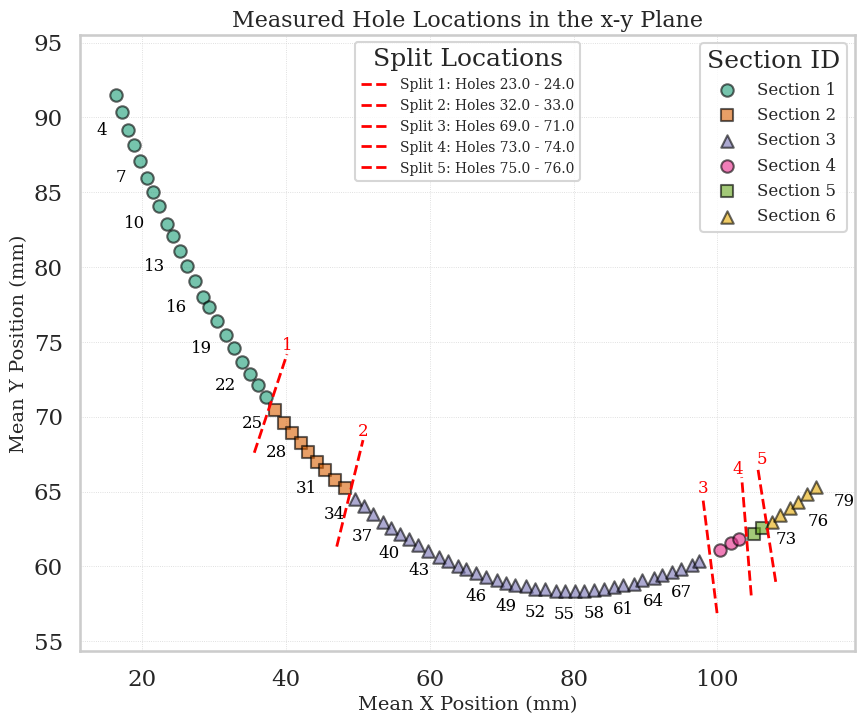

In [7]:
Antikythera_Anisotropic_Basic_Filter.plot_hole_locations()

### Plotting observed data for `Filtering = Full`

In [8]:
Antikythera_Anisotropic_Full_Filter = Calender_Analysis(data = original_data_path, model_type = "anisotropic", filtering = 'Full', priors = None, num_cores = 4)

2025-03-11 14:31:01,356 - INFO - JAX Detected Devices: 8
2025-03-11 14:31:01,358 - INFO - JAX configured to use 4 devices for parallel chains.
2025-03-11 14:31:01,398 - INFO -  
        DATA SUMMARY
Total Sections   : 4
Total Holes      : 66
---------------------------------
Section ID   |   Hole Range 
--------------------------------- 
      1      |   3 - 22
      2      |   25 - 31
      3      |   34 - 68
      4      |   77 - 80 
--------------------------------- 


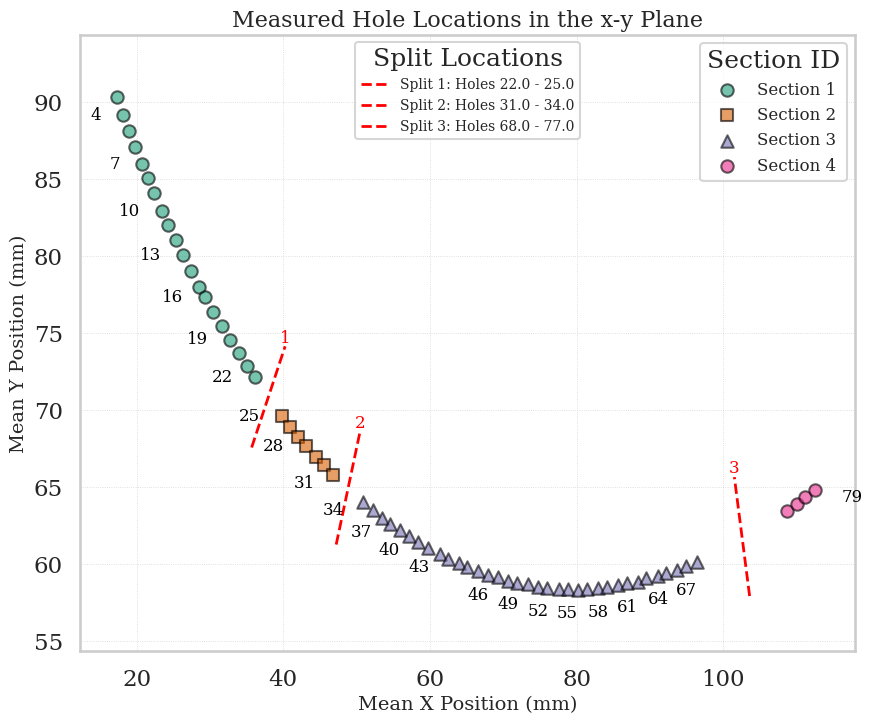

In [9]:
Antikythera_Anisotropic_Full_Filter.plot_hole_locations()

## Likelihood Function

The likelihood function evaluates how well the observed hole positions match the expected positions under a **Gaussian error model**. It supports two cases:

- **Isotropic Gaussian**: A single standard deviation $\sigma$ applies to both x and y errors.
- **Anisotropic Gaussian**: Separate standard deviations $\sigma_r$ and $\sigma_t$ account for radial and tangential errors.

The log-likelihood is given by:

### **Isotropic Model**
$$
\log L = -\frac{1}{2} \sum_i \left(\frac{(e_{i,x})^2 + (e_{i,y})^2}{\sigma^2} \right) - n \log(2\pi\sigma)
$$
where:
- $ e_{i,x} = x_{\text{obs},i} - x_{\text{model},i} $ (x-coordinate error)
- $ e_{i,y} = y_{\text{obs},i} - y_{\text{model},i} $ (y-coordinate error)
- $ \sigma $ represents a shared uncertainty in both directions.

### **Anisotropic Model**
$$
\log L = -\frac{1}{2} \sum_i \left( \frac{(e_{i,r})^2}{\sigma_r^2} + \frac{(e_{i,t})^2}{\sigma_t^2} \right) - n \log(2\pi\sigma_r\sigma_t)
$$
where:
- $ e_{i,r} $ and $ e_{i,t} $ are the radial and tangential errors.
- $ \sigma_r $ and $ \sigma_t $ account for uncertainties in the radial and tangential directions, respectively.


The transformation from Cartesian errors $ (e_{i,x}, e_{i,y}) $ to radial and tangential errors $ (e_{i,r}, e_{i,t}) $ is given by:


- $e_{i,r} = e_{i,x} \cos\theta_i + e_{i,y} \sin\theta_i$

- $e_{i,t} = -e_{i,x} \sin\theta_i + e_{i,y} \cos\theta_i$

where $ \theta_i $ is the angular position of the hole relative to the center of the ring.


## Implementation

The code contains the following two functions: 

### **`.hole_positions`**
This function computes the expected x and y positions of holes based on the model parameters. It assumes the holes are arranged in a circular ring and accounts for section-specific displacements and rotations.

**Inputs:**
- **N**: Total number of holes in the original unfragmented ring.
- **r**: Estimated radius of the ring.
- **x0, y0**: Section-specific x and y offsets.
- **alpha**: Angular offsets for each section.
- **section_ids**: (Optional) Identifiers for each section, defaults to observed data.
- **hole_nos**: (Optional) Hole numbers corresponding to each modeled hole, defaults to observed data.

**Outputs:**
- A 2D array of shape (N_holes, 2), containing the expected x and y coordinates of each hole.

### **`.likelihood`**
This function evaluates how well the observed hole positions match the expected positions under a **Gaussian error model**. It supports both **isotropic** (single error term) and **anisotropic** (separate radial and tangential errors) models.

**Inputs:**
- **N, r, x0, y0, alpha**: Model parameters.
- **sigma**: Measurement uncertainty (single value for isotropic, two values for anisotropic).
- **log**: If True, returns the log-likelihood.
- **neg**: If True, returns the negative log-likelihood (useful for optimisation).
- **data**: (Optional) A subset of the dataset for mini-batch likelihood evaluation to support Supports **stochastic gradient descent (SGD)**

**Outputs:**
- Likelihood or log-likelihood value.




In [10]:
# Verifying functionality - this is done using the results from Woan & Bayley, 2024
# Given values 
N = 355.24
r = 77.34
x0 = jnp.array([79.69, 79.91, 79.86, 81.44, 81.56, 83.22])
y0 = jnp.array([136.03, 135.71, 135.71, 136.10, 135.85, 136.42])
alpha_deg = jnp.array([-145.72, -145.67, -145.54, -146.71, -146.36, -147.80])
alpha = (jnp.radians(alpha_deg) + jnp.pi) % (2 * jnp.pi) - jnp.pi # Convert alpha from degrees to radians 
sigma = jnp.array([0.028, 0.129])

# By not providing specific hole numbers and locations it will use those of the observed measurements
hole_positions = Antikythera_Anisotropic_Basic_Filter.hole_positions(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha)
# Extract the hole numbers and sections used
hole_nos, section_nos = Antikythera_Anisotropic_Basic_Filter.hole_nos_obs, Antikythera_Anisotropic_Basic_Filter.section_ids_obs


# By not providing data to the likelihood function it will use that from the observed measurements
# Taking the value of the
likelihood_of_params = Antikythera_Anisotropic_Basic_Filter.likelihood(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, log = False, neg = False, data = None)
log_likelihood_of_params = Antikythera_Anisotropic_Basic_Filter.likelihood(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, log = True, neg = False, data = None)
neg_log_likelihood_of_params = Antikythera_Anisotropic_Basic_Filter.likelihood(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, log = True, neg = True, data = None)

In [28]:
### Display results ###
hole_data = {
    "Hole ID": list(map(str, hole_nos)),
    "Section ID": list(map(str, section_nos)),
    "X Position": [f"{pos[0]:.2f}" for pos in hole_positions.tolist()],
    "Y Position": [f"{pos[1]:.2f}" for pos in hole_positions.tolist()]
}
hole_df = pd.DataFrame(hole_data)
print("\n### Hole Positions, Hole Numbers, and Section Numbers ###\n")
print(hole_df.to_string(index=False))

# Display the results for the likelihood function
print("\nLikelihood Values:")
print(f"Log-Likelihood: {log_likelihood_of_params:.6f}")
print(f"Negative Log-Likelihood: {neg_log_likelihood_of_params:.6f}")

NameError: name 'hole_nos' is not defined

## Likelihood of Gradients

This pipeline has implemented two methods to generate the gradients of the derivative function:
Both take:
- **Inputs:** Model parameters (**N, r, x0, y0, alpha, sigma**), log-likelihood flag, and optional dataset (for stochastic gradient descent).
- **Output:** A dictionary of analytically computed gradients.

### **Automatic Differentiation**
This method leverages **JAX's jax.grad** to compute gradients numerically. It differentiates the likelihood function with respect to all model parameters without requiring explicit derivative calculations.

- **Function:** `.grad_likelihood()`

### **Analytical Differentiation**
This method explicitly derives the **partial derivatives** of the log-likelihood function using the **chain rule**. 

- **Function:** `.analytic_grad_loglikelihood()`


### **Comparison of Methods**
Both methods were implemented to cross-validate the correctness of the computed gradients.

| Method                   | Advantages                                      | Disadvantages                                  |
|--------------------------|------------------------------------------------|----------------------------------------------|
| **Automatic Differentiation** | Easy to implement, adapts to function changes | Less stable |
| **Analytical Differentiation** | More stable, explicit formulas for gradients  | Requires manual derivation,  not flexible to adaptations to likelihood |

The function **compare_performance_grad()** systematically compares these methods by:
- Drawing **num_runs** random batch of data points to use in the gradient calculations
- For each run its measures:
    1. **Execution Time**: The speed of computing gradients.
    2. **Memory Usage**: The peak memory consumed by each approach.
	4. **Gradient Agreement**: Whether both methods produce gradients that match within a set **tolerance** (1e-3).

In [12]:
# Proof of derivates calculated on all data for both methods - with data = None uses full batch of observed data - preformed for log-likelihood
# Automatic differentiation
auto_diff = Antikythera_Anisotropic_Basic_Filter.grad_likelihood(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, log = True, neg = False, data = None)
# Analytic differentiation
analytic_diff = Antikythera_Anisotropic_Basic_Filter.analytic_grad_loglikelihood(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, neg = False, data = None)

In [13]:
### Display results ###
def flatten_with_labels(param_name, values):
    if isinstance(values, (jnp.ndarray, list)) and values.ndim > 0: 
        return [(f"{param_name}_{i+1}", val) for i, val in enumerate(values.tolist())]
    return [(param_name, float(values))] 

flattened_data = []
for param in ["N", "r", "x0", "y0", "alpha", "sigma"]:
    flattened_data.extend(flatten_with_labels(param, auto_diff[param]))

comparison_rows = []
for label, auto_value in flattened_data:
    base_param = label.split("_")[0] 
    
    if "_" in label:
        index = int(label.split("_")[-1]) - 1 
        analytic_value = float(analytic_diff[base_param][index])  
    else:
        analytic_value = float(analytic_diff[base_param])
    
    diff_value = abs(auto_value - analytic_value)
    comparison_rows.append([label, auto_value, analytic_value, diff_value])

comparison_df = pd.DataFrame(comparison_rows, columns=["Parameter", "Auto-Diff", "Analytic-Diff", "Difference"])
print("\nGradient Comparison: Automatic vs Analytical Differentiation \n")
print(comparison_df.to_string(index=False))


Gradient Comparison: Automatic vs Analytical Differentiation 

Parameter   Auto-Diff  Analytic-Diff   Difference
        N    0.308698       0.308698 3.552714e-15
        r -253.295342    -253.295342 8.526513e-14
     x0_1   66.521325      66.521325 0.000000e+00
     x0_2   31.534924      31.534924 1.421085e-14
     x0_3    3.613281       3.613281 3.552714e-15
     x0_4   -4.922497      -4.922497 0.000000e+00
     x0_5   -7.070849      -7.070849 0.000000e+00
     x0_6  -10.546978     -10.546978 1.776357e-15
     y0_1   74.732860      74.732860 1.421085e-14
     y0_2   68.090918      68.090918 1.421085e-14
     y0_3    6.374457       6.374457 3.552714e-14
     y0_4   21.360519      21.360519 3.552714e-15
     y0_5   23.151194      23.151194 0.000000e+00
     y0_6   22.276707      22.276707 0.000000e+00
  alpha_1 -288.531351    -288.531351 1.364242e-12
  alpha_2 -342.150886    -342.150886 1.250555e-12
  alpha_3  231.098621     231.098621 2.273737e-13
  alpha_4   67.241104      67.241104

In [14]:
# Run comparison over 100 samples with tolerance 1e-5, each run using 40 random data points from obersvations to calculate likelihood
comparison_results = Antikythera_Anisotropic_Basic_Filter.compare_performance_grad(N = N, r = r, x0 = x0, y0 = y0, alpha = alpha, sigma = sigma, tolerance = 1e-5, num_runs = 100, subset_size = 40, return_results = True)

2025-03-11 14:31:23,109 - INFO - 
Performance & Accuracy Comparison (100 runs):
------------------------------------------------------------
Method:                 Auto-Diff              Manual-Diff
Avg Execution Time (s): 0.107245 ± 0.216642   0.038488 ± 0.169498
Avg Peak Memory (KB):   291.27 ± 111.10        96.95 ± 84.58
Gradient Agreement:      MATCH
Max Deviation:          2.274e-12
------------------------------------------------------------


## Maximum Likelihood Estimate

As outlined above the likelihood and gradient functions were designed to be able to accept batches of observed data, enabling use of stochastic approaches.

The Maximum Likelihood Estimation (MLE) framework implemented in this notebook implements gradient descent-based stochastic optimisation techniques, including:

- **Stochastic Gradient Descent (SGD)**
- **Adam Optimizer**

The method minimizes the negative log-likelihood of the dataset, and the user can select between:

- **Analytical gradients** (explicitly derived derivatives)
- **Automatic differentiation** (computed via JAX)

In this notebook, the analytical gradients, as they demonstrated significantly higher computational efficiency in both processing speed and memory usage above.

### Initialisation

The function takes in:

- An optimization algorithm (SGD or Adam)
- Hyperparameters such as:  **learning rate, number of iterations, batch size, etc.**
- A prior distribution from which random initial points are drawn from to give sensible starts.

### Optimisation Loop

The optimization process is repeated over `num_samples` different initializations, helping to explore sensible parameter regions.

Model parameters are updated iteratively using either **SGD** or **Adam**.

If `plot_history=True`, the log-likelihood history is recorded and plotted to visualize convergence.

### Parameter Constraints & Filtering

- The `alpha` parameter (angular offsets) is constrained to remain within [-π, π] to ensure consistency.
- Unphysical solutions where `N < 0` or `r < 0` are automatically filtered out to maintain validity.

### Final Selection of Best-Fit Parameters

The best-fit parameters are chosen based on the maximum log-likelihood achieved.


Optimizing MLE using Adam::   0%|          | 0/1 [00:00<?, ?it/s]

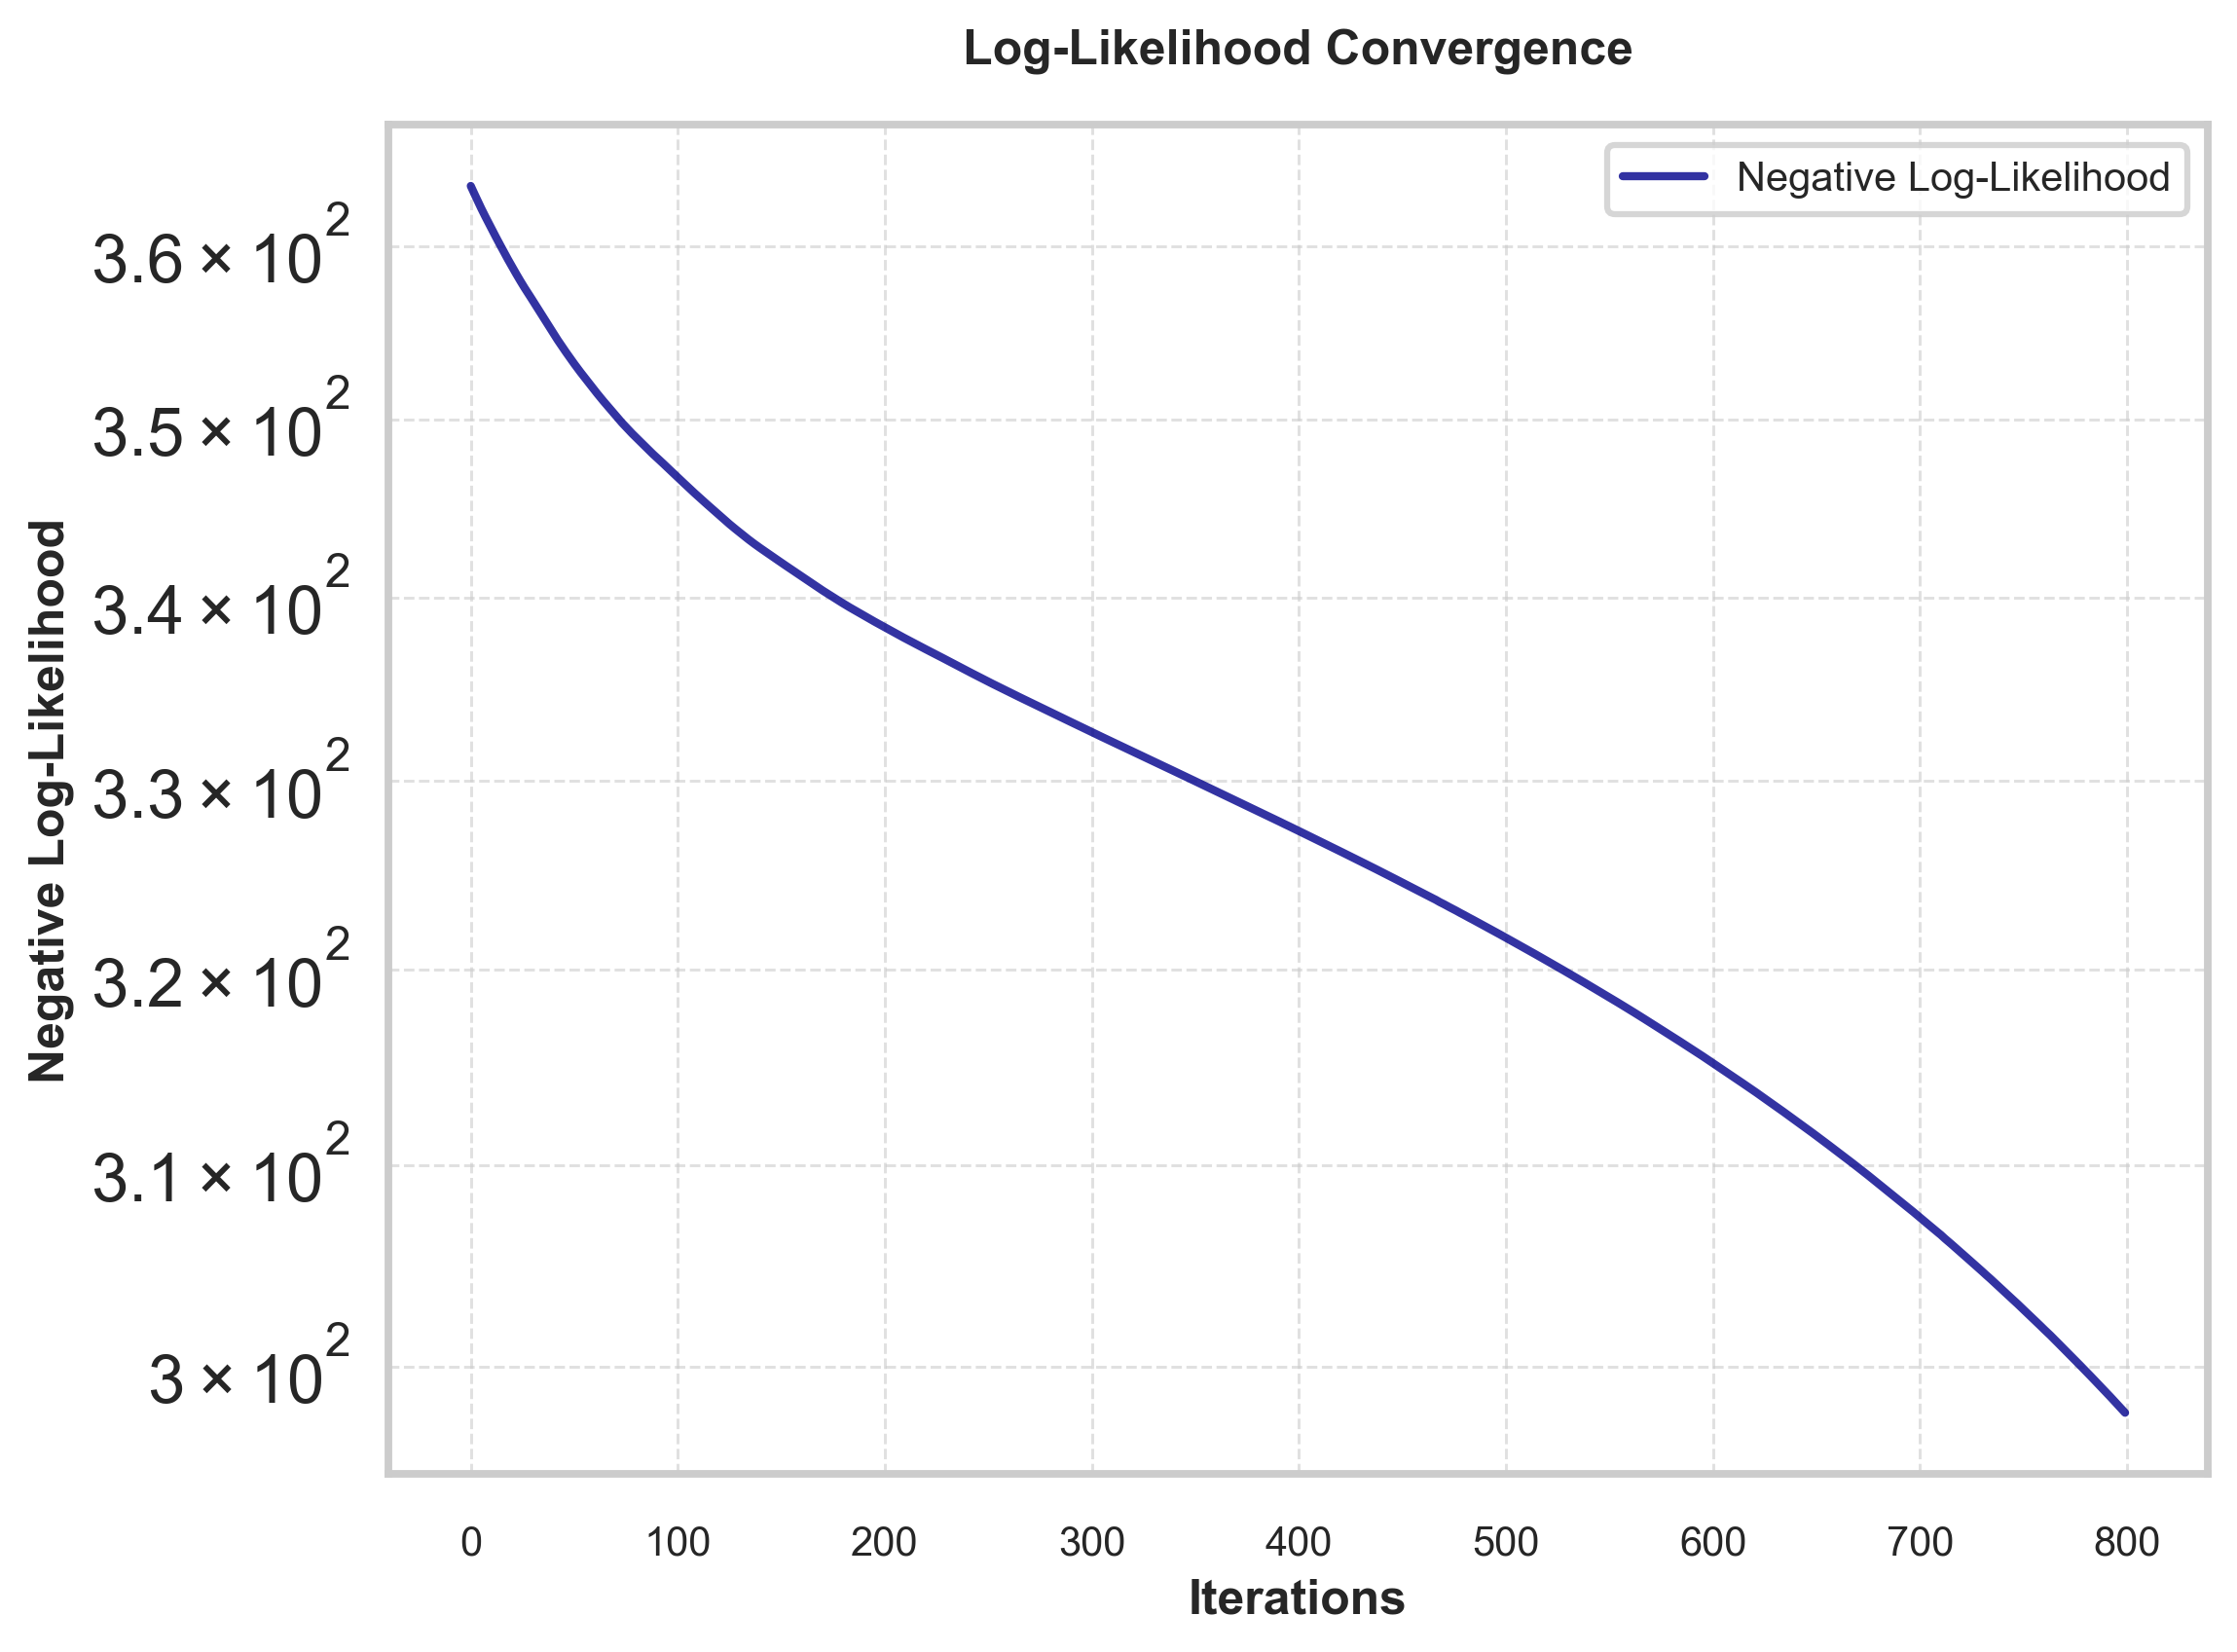

2025-03-11 14:31:43,609 - INFO - Removed 0/1 MLE estimates due to unphysical values (N or r < 0).


In [15]:
# Initial run to show training through gradient descent
mle_results_1 = Antikythera_Anisotropic_Basic_Filter.max_likelihood_est(sampling_type = 'Adam', num_samples=1, num_iterations=1000, learning_rate=0.05, batch_size=50, key=32, derivative='analytic', plot_history=True, summary_table = None, save_path = None)

In [26]:
# Full optimisation using 100 initialisations from prior
if rerun_comp_expensive_analysis:
    mle_results_full = Antikythera_Anisotropic_Basic_Filter.max_likelihood_est(sampling_type = 'Adam', num_samples=20, num_iterations=1000, learning_rate=0.1, batch_size=50, key=1, derivative='analytic', plot_history=False, summary_table = 5, save_path = 'stored_results/Anistropic_Basic_MLE_Results.pkl')
# if not run, load back data
else:
    mle_results_full = pd.read_pickle('stored_results/Anistropic_Basic_MLE_Results.pkl')

/Users/jacobtutt/Desktop/MPhil_DIS/S2/Coursework_S2/calender_analysis/analysis.py:1565: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(mle_hole_positions_x, mle_hole_positions_y,


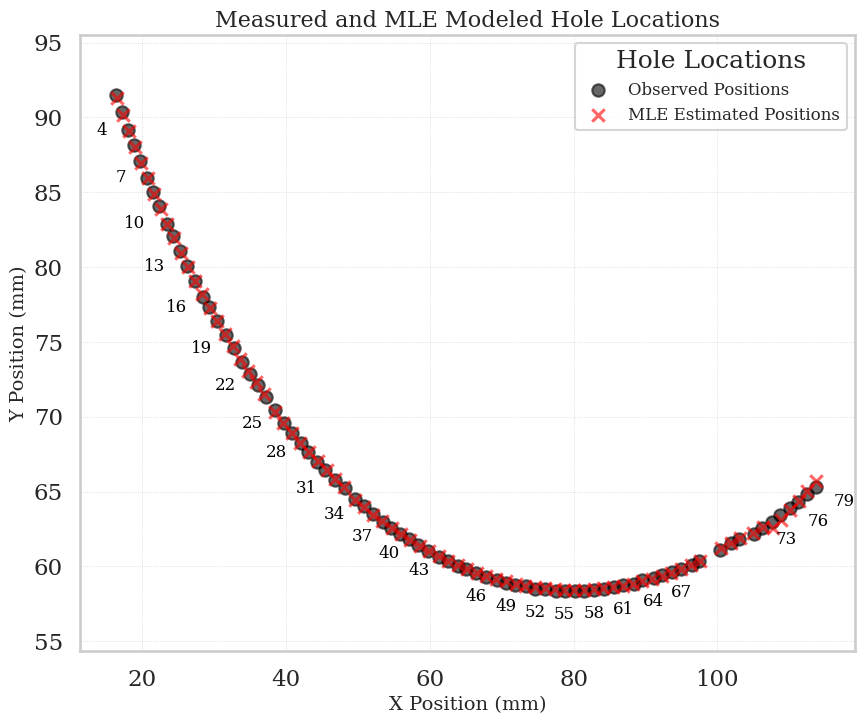

In [ ]:
Antikythera_Anisotropic_Basic_Filter.mle_analysis(mle_results_full)

## Posterior Analysis 

### Hamiltonian Monte Carlo (No U-Turn) Sampling 

#### **Burn-in Adaptation: NUTS vs. Ordinary HMC**

Unlike standard HMC, where step size and trajectory length must be manually tuned before sampling begins, NUTS uses the burn-in phase to learn and adjust these hyperparameters automatically.

| Feature                  | Ordinary HMC                          | NUTS (No-U-Turn Sampler) |
|--------------------------|--------------------------------------|--------------------------|
| **Step Size Adjustment** | Fixed, requires manual tuning       | Adapted dynamically via dual averaging |
| **Trajectory Length**    | Fixed number of leapfrog steps, must be pre-set | Automatically determined using U-turn detection |
| **Mass Matrix**          | Typically diagonal, no adaptation   | Adapted dynamically (dense or diagonal) based on posterior correlations |
| **Efficiency**           | Can be inefficient if hyperparameters are poorly chosen | Self-adjusting, more efficient for complex posteriors |

#### **No U Turn Criterion**
- In NUTS the sampler dynamically decides when to stop each trajectory, avoiding U-turns and prevents excessive computation
- Efficiently explores the posterior distribution.


### Burn In Analysis
- Determining optimal burn-in is not only important to ensure that samples have converged to stationary distribution but also allows sample to dynamically adjust to posterior (trajectory length, mass matrix)

#### Short Burn In - 50 Samples

  0%|          | 0/1150 [00:00<?, ?it/s]

  0%|          | 0/1150 [00:00<?, ?it/s]

  0%|          | 0/1150 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
         N    356.62      2.46    356.20    352.79    360.23      2.21      1.84
  alpha[0]      3.74      0.00      3.74      3.74      3.74      2.80      1.47
  alpha[1]     -2.54      0.00     -2.54     -2.55     -2.53      2.90      1.39
  alpha[2]     -2.54      0.01     -2.54     -2.55     -2.53      2.24      1.82
  alpha[3]     -2.55      0.02     -2.55     -2.58     -2.53     22.84      1.07
  alpha[4]     -2.55      0.03     -2.54     -2.59     -2.50     88.29      1.02
  alpha[5]     -2.57      0.01     -2.57     -2.59     -2.56      2.43      1.57
         r     77.63      0.53     77.53     76.90     78.49      2.20      1.90
   sigma_r      0.03      0.00      0.03      0.03      0.04      1.87      2.11
   sigma_t      0.13      0.01      0.13      0.11      0.15    171.80      1.02
     x0[0]     79.89      0.37     79.82     79.38     80.49      2.24      1.86
     x0[1]     80.03      0

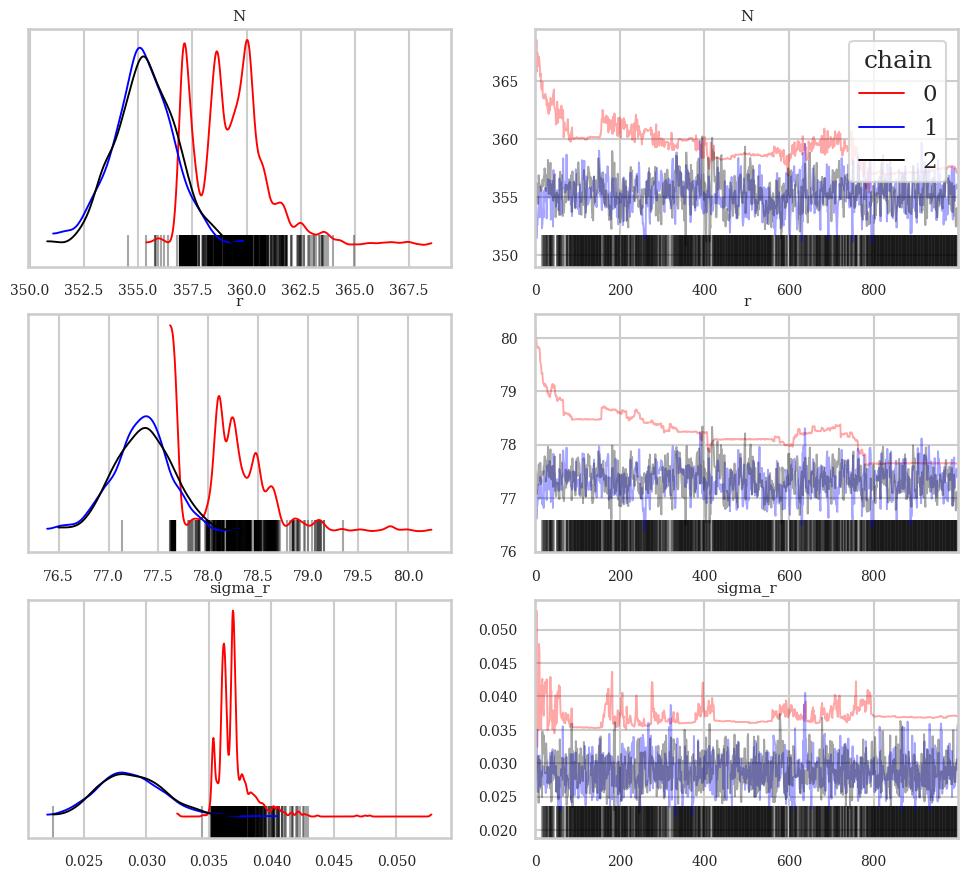

2025-03-11 14:49:25,828 - INFO - Total MCMC Run Time: 60.42 seconds 
 Non Burn-In Run Time: 52.54 seconds


In [25]:
short_burn_in = Antikythera_Anisotropic_Basic_Filter.run_hmc_nuts(burnin_period=150, n_samples=1000, n_chains=3, step_size=1, acceptance_prob=0.8, dense_mass=False, summary = True, random_seed=0, save_path=None, traceplot= ['N', 'r', 'sigma_r'], progress_bar=True)

#### Long Burn In - 500 Samples

  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

  0%|          | 0/1600 [00:00<?, ?it/s]

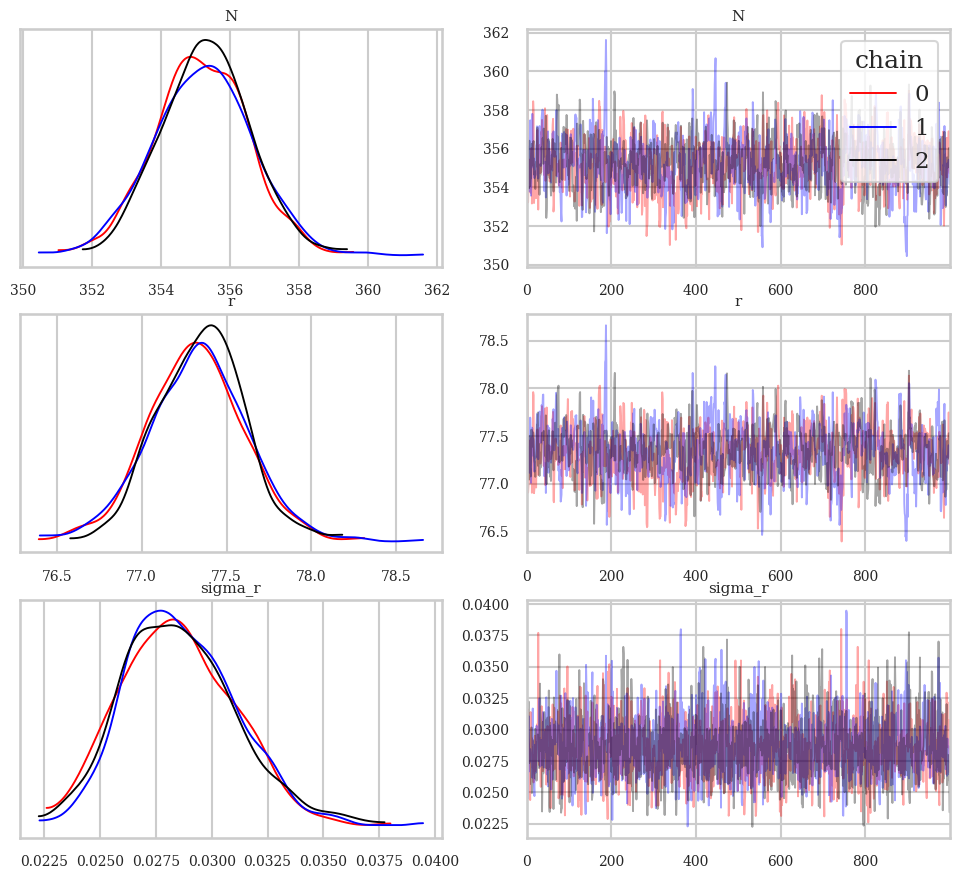

2025-03-11 14:45:51,511 - INFO - Total MCMC Run Time: 58.83 seconds 
 Non Burn-In Run Time: 36.77 seconds


In [ ]:
long_burn_in = Antikythera_Anisotropic_Basic_Filter.run_hmc_nuts(burnin_period=600, n_samples=1000, n_chains=3, step_size=1, acceptance_prob=0.8, dense_mass=False, summary = True, random_seed=0, save_path=None, traceplot= ['N', 'r', 'sigma_r'], progress_bar=True)

## **Optimising Initialisation**  

Although optimisation of initial parameters is less important than in traditional Hamiltonian Monte Carlo, as the **NUTS algorithm** dynamically adjusts hyperparameters during the **burn-in phase** and determines trajectory length automatically, it is still performed to **minimise the required burn-in period**. By selecting **good initialisation points**, the adaptation phase can be shortened, leading to **more efficient sampling**.  

### **Metrics Measured**  
- **Autocorrelation Length**: Estimated autocorrelation length.  
- **Number of Effective Samples**: Minimum effective sample size across parameters.  
- **GR Statistic**: Gelman-Rubin diagnostic (values close to 1 indicate convergence).  
- **Time per Iteration**: Average computation time per sample.  

### **Optimisation Criterion**  
- **Time Per Effective Sample**: Measures overall computational efficiency. Lower values indicate faster convergence and better sampling efficiency.  


In [3]:
if rerun_comp_expensive_analysis:
    step_size_range = [0.05, 0.1, 0.5, 1, 5]
    acceptance_prob_range = [0.65, 0.75, 0.85, 0.90]
    dense_mass_options = [False, True]
    
    nuts_optimal_params = Antikythera_Anisotropic_Basic_Filter.run_hmc_optimisation(step_size_range, acceptance_prob_range, dense_mass_options, burnin_period=1000, n_samples=2000, n_chains=4, random_seed=0, save_path='stored_results/Anistropic_Basic_HMC_Opt_Results.csv', no_table_results=5)

else: 
    nuts_optimal_params = pd.read_csv('stored_results/Anistropic_Basic_HMC_Opt_Results.csv')

## **Run Optimised NUTS**  

Once the **optimal hyperparameters** have been determined, they are used to generate posterior samples for analysis. This ensures that **sampling is as efficient as possible**, reducing the computational cost while maintaining statistical accuracy.  

Instead of running a fixed number of samples, this method **automatically determines** how many total samples need to be generated to achieve the desired number of **independent** (effectively uncorrelated) samples.  

### **Sampling Process**  
1. **Determine total samples needed per chain**  
   - Uses the estimated **autocorrelation length** to compute the necessary number of raw samples.  
   - Ensures that after thinning, the final dataset contains the required number of **independent** samples.  

2. **Run MCMC with optimised hyperparameters**  
   - Uses multiple **parallel chains** to improve convergence diagnostics.  
   - Computes the **Gelman-Rubin statistic (R-hat)** to verify sampling quality.  

3. **Thin the samples**  
   - Selects every `autocorrelation length` sample to ensure the remaining set is effectively independent.  

4. **Save and return results**  
    - **Returns two datasets**:  
    1. **Full posterior samples** (for visualization and diagnostics).  
    2. **Thinned posterior samples** (for statistical analysis, ensuring minimal correlation).  

In [ ]:
if rerun_comp_expensive_analysis:
    posterior_data, thinned_posterior = Antikythera_Anisotropic_Basic_Filter.run_hmc_optimised(nuts_optimal_params, burnin_period=2000, n_samples=6000, n_chains =  4, random_seed=0, save_path = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', traceplot=None)

2025-03-11 15:21:10,704 - INFO - Running MCMC with Optimised Hyperparameters: step_size=1, accept_prob=0.85, dense_mass=False
Due to Autocorrelation Length: 2, the number of effective samples is reduced.
Total samples required to achieve 6000 effective samples: 12000
This is run on 4 parrallel chains each running 3000 samples.


  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 0/5000 [00:00<?, ?it/s]

2025-03-11 15:24:30,809 - INFO -  MCMC samples saved to stored_results/Anisotropic_Basic_Opt_NUTS.nc
2025-03-11 15:24:30,811 - INFO - Total MCMC Run Time: 188.56 seconds 
 Non Burn-In Run Time: 113.14 seconds
2025-03-11 15:24:31,099 - INFO -  Over 4 chains, 12000 were run, 
Achieved Gelman-Rubin Statistic: 1.0006, 
Achieved Effective Samples: 8394, 
True Auto-correlation Length: 2
2025-03-11 15:24:31,101 - INFO - Total samples remaining after thinning: 6000
2025-03-11 15:24:35,828 - INFO - Full MCMC samples saved to stored_results/Anisotropic_Basic_Opt_NUTS.nc
 Thinned MCMC samples saved to stored_results/Anisotropic_Basic_Opt_NUTS_thinned.nc


## **Analyse NUTS Sampler**

2025-03-11 15:28:16,236 - INFO - Loaded full and thinned posterior data stored_results/Anisotropic_Basic_Opt_NUTS.nc.
2025-03-11 15:28:16,696 - INFO - NOTE: When comparing the results to the paper, the section indexes are not comparable, but there order is


,median,68%,90%,95%,99%
parameter,,,,,
N,355.233,+1.3760 − 1.4200,+2.3650 − 2.2630,+2.8700 − 2.6380,+3.7490 − 3.4970
alpha[0],3.740,+0.0010 − 0.0010,+0.0020 − 0.0020,+0.0020 − 0.0020,+0.0030 − 0.0030
alpha[1],-2.543,+0.0040 − 0.0030,+0.0060 − 0.0050,+0.0070 − 0.0060,+0.0090 − 0.0080
alpha[2],-2.540,+0.0030 − 0.0040,+0.0060 − 0.0060,+0.0070 − 0.0070,+0.0090 − 0.0090
alpha[3],-2.560,+0.0160 − 0.0150,+0.0260 − 0.0250,+0.0310 − 0.0310,+0.0410 − 0.0400
alpha[4],-2.549,+0.0310 − 0.0300,+0.0490 − 0.0500,+0.0580 − 0.0580,+0.0790 − 0.0760
alpha[5],-2.579,+0.0070 − 0.0080,+0.0130 − 0.0130,+0.0150 − 0.0150,+0.0190 − 0.0200
r,77.333,+0.2830 − 0.2850,+0.4870 − 0.4530,+0.5940 − 0.5470,+0.7760 − 0.7130
sigma_r,0.028,+0.0030 − 0.0020,+0.0050 − 0.0030,+0.0060 − 0.0040,+0.0090 − 0.0050


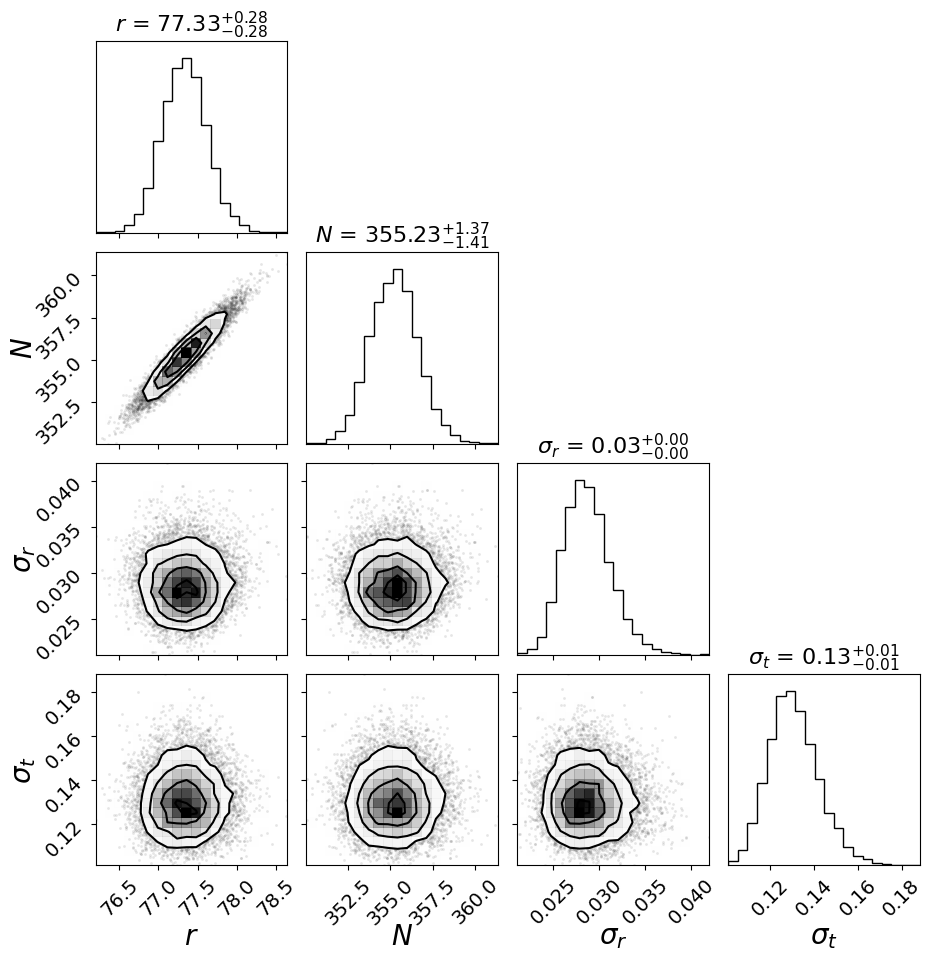

In [7]:
Antikythera_Anisotropic_Basic_Filter. thinned_hcm_analysis(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', summary_table=True, corner_plot=["r", "N", "sigma_r", "sigma_t"])

2025-03-11 15:29:53,361 - INFO - Loaded full and thinned posterior data stored_results/Anisotropic_Basic_Opt_NUTS.nc.


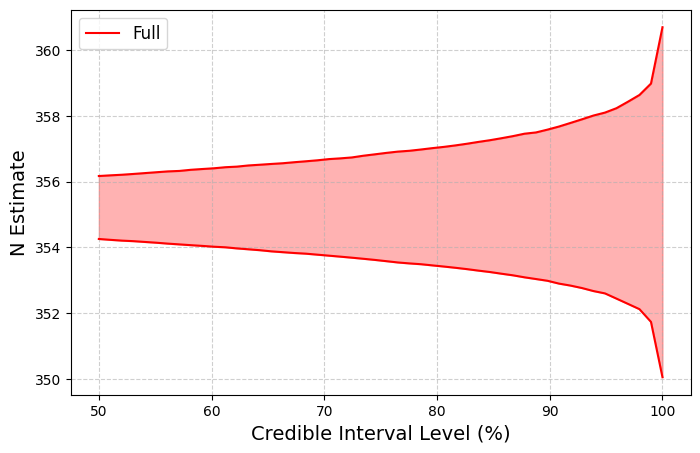

In [8]:
Antikythera_Anisotropic_Basic_Filter.plot_credible_intervals(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', param="N", percentiles_range=(50, 100))

2025-03-11 15:30:14,328 - INFO - Loaded full and thinned posterior data stored_results/Anisotropic_Basic_Opt_NUTS.nc.


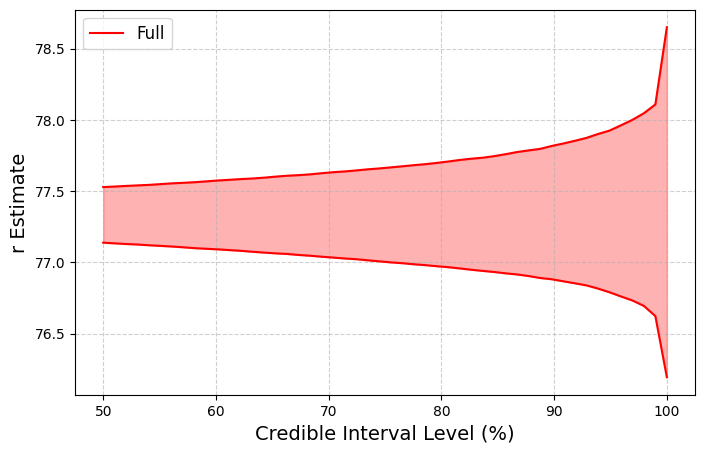

In [10]:
Antikythera_Anisotropic_Basic_Filter.plot_credible_intervals(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', param="r", percentiles_range=(50, 100))

2025-03-11 15:30:41,928 - INFO - Loaded full and thinned posterior data stored_results/Anisotropic_Basic_Opt_NUTS.nc.


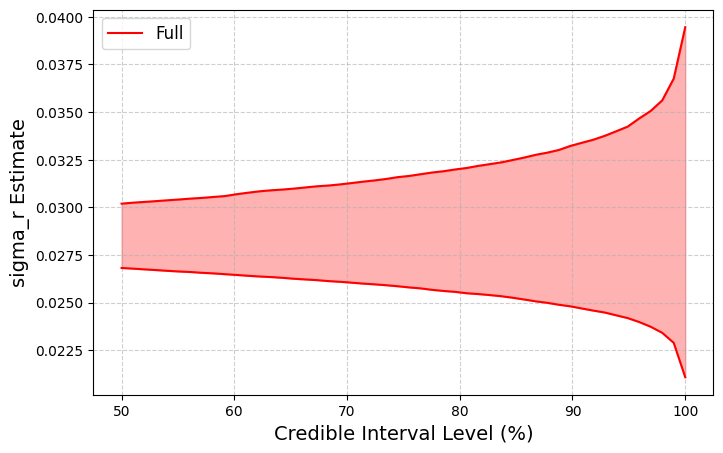

In [12]:
Antikythera_Anisotropic_Basic_Filter.plot_credible_intervals(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', param="sigma_r", percentiles_range=(50, 100))

2025-03-11 15:31:00,548 - INFO - Loaded full and thinned posterior data stored_results/Anisotropic_Basic_Opt_NUTS.nc.


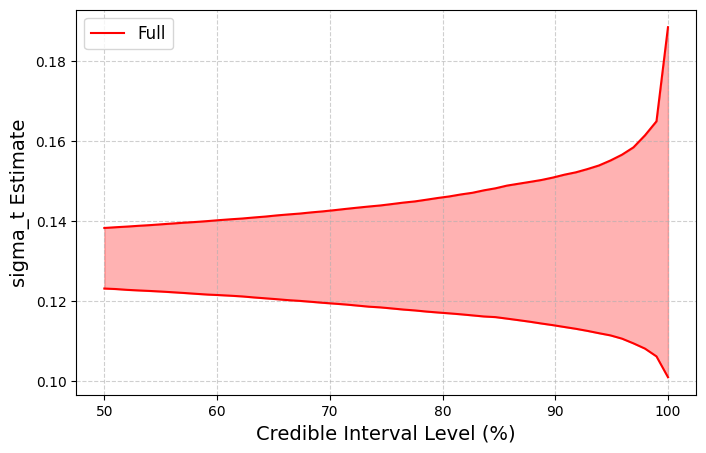

In [13]:
Antikythera_Anisotropic_Basic_Filter.plot_credible_intervals(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', param="sigma_t", percentiles_range=(50, 100))

2025-03-11 17:40:53,077 - INFO - Loaded thinned posterior data from NetCDF file.
2025-03-11 17:40:53,078 - INFO - Loaded posterior data from NetCDF file.


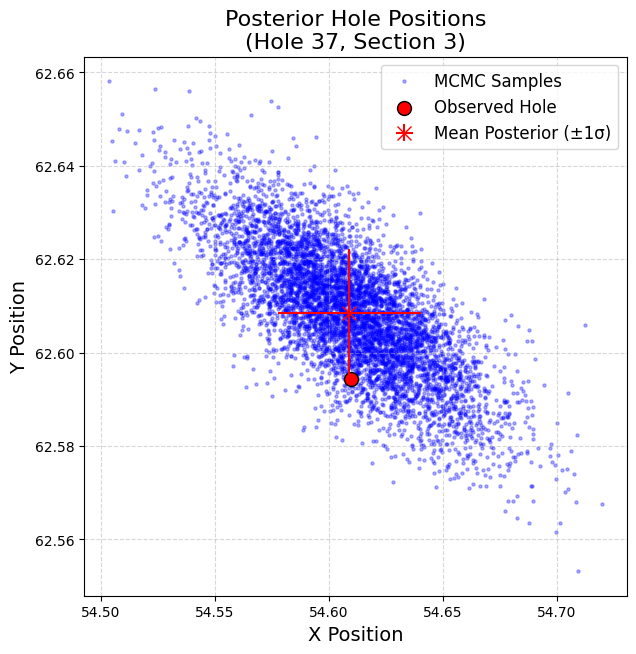

In [22]:
Hole_loc = Antikythera_Anisotropic_Basic_Filter.plot_posterior_holes(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', hole_no=37, section_no=3)

2025-03-11 17:43:36,239 - INFO - Loaded thinned posterior data from NetCDF file.
2025-03-11 17:43:36,239 - INFO - Loaded posterior data from NetCDF file.


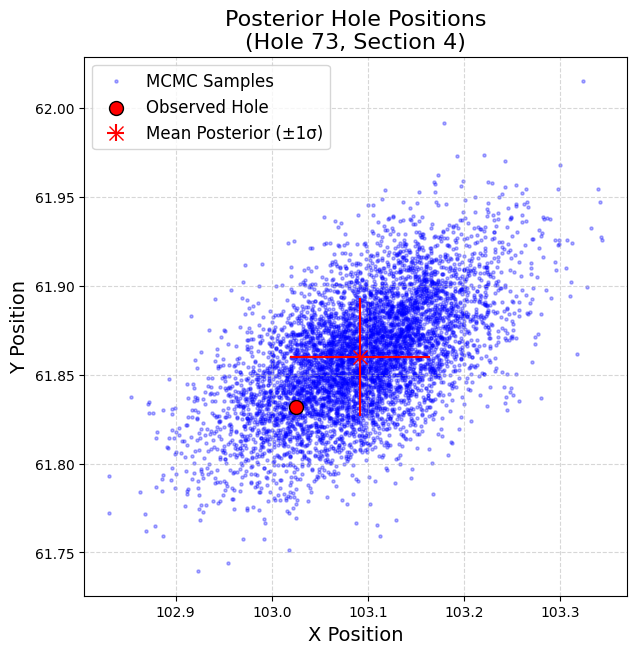

In [27]:
Hole_loc = Antikythera_Anisotropic_Basic_Filter.plot_posterior_holes(posterior_data = 'stored_results/Anisotropic_Basic_Opt_NUTS.nc', hole_no=73, section_no=4 )